## **Proyek Pertama Machine Learning : Car Crash**
*   **Nama: Masdarul Rizqi**
*   **Email: m.rizqi1221@gmail.com**
*   **ID Dicoding: masdarulrizqi**

###  **1.   Import**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import zipfile
import chardet
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import cross_val_score

In [2]:
local_zip = './Data/Car Crash Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./Data')
zip_ref.close()

### **2. Load Dataset**

#### **2.1 Mengecek tipe encoding file**

In [3]:
df = "data/monroe county car crach 2003-2015.csv"
rawdata = open(df, 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']

print(f"Encoding file adalah: {encoding}")

Encoding file adalah: ISO-8859-1


####  **2.2 Memanggil dataframe**

In [4]:
df = pd.read_csv(df, delimiter=',', encoding='ISO-8859-1')
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


### **3. Data Understanding**
Attribute  | Keterangan
------------- | -------------
Year | merepresentasikan tahun kejadian tabrakan
Month | merepresentasikan bulan kejadian tabrakan
Day | merepresentasikan hari kejadian tabrakan 
Weekend? | merepresentasikan apakah tabrakan terjadi di akhir pekan atau bukan
Hour | merepresentasikan jam kejadian tabrakan.       
Collision Type | merepresentasikan jenis tabrakan
Injury Type  | merepresentasikan jenis cedera
Primary Factor |merepresentasikan faktor utama penyebab tabrakan
Reported_Location |merepresentasikan lokasi kejadian tabrakan
Latitude |merepresentasikan garis lintang lokasi kejadian
Longitude |merepresentasikan garis bujur lokasi kejadian

#### **3.1  mengecek semua hal tentang Data**

In [5]:
# Mengecek Deskripsi
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [6]:
# Mengecek Informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [7]:
# Mengecek dimensi dari data struktur
df.shape

(53943, 11)

In [8]:
# Mengecek jumlah baris data dari setiap nilai unik
def show_value_counts(df, column):
    return df[column].value_counts().sort_index(ascending=False)

result_year = show_value_counts(df, 'Year')
result_month = show_value_counts(df, 'Month')
result_day = show_value_counts(df, 'Day')
result_weekend = show_value_counts(df, 'Weekend?')
result_hour = show_value_counts(df, 'Hour')

In [9]:
result_year

Year
2015    4313
2014    4167
2013    4058
2012    4223
2011    3914
2010    4060
2009    4014
2008    4341
2007    4055
2006    3937
2005    3967
2004    4269
2003    4625
Name: count, dtype: int64

In [10]:
result_month

Month
12    4598
11    4884
10    5581
9     4994
8     4480
7     3820
6     3752
5     4212
4     4574
3     3842
2     4541
1     4665
Name: count, dtype: int64

In [11]:
result_day

Day
7    7364
6    9680
5    8122
4    7880
3    8133
2    7473
1    5291
Name: count, dtype: int64

In [12]:
result_weekend

Weekend?
Weekend    13271
Weekday    40604
Name: count, dtype: int64

In [13]:
result_hour

Hour
2300.0    1187
2200.0    1503
2100.0    1794
2000.0    1918
1900.0    2442
1800.0    3232
1700.0    4631
1600.0    4488
1500.0    4283
1400.0    3750
1300.0    3526
1200.0    3819
1100.0    3040
1000.0    2360
900.0     2318
800.0     2247
700.0     2031
600.0      806
500.0      514
400.0      478
300.0      719
200.0      716
100.0      801
0.0       1115
Name: count, dtype: int64

In [14]:
result_collision = show_value_counts(df, 'Collision Type')
result_injury = show_value_counts(df, 'Injury Type')
result_primary = show_value_counts(df, 'Primary Factor')
result_rl = show_value_counts(df, 'Reported_Location')
result_long = show_value_counts(df, 'Longitude')

In [15]:
result_collision

Collision Type
Pedestrian            609
Moped/Motorcycle     1007
Cyclist               468
Bus                   850
3+ Cars              3152
2-Car               37606
1-Car               10245
Name: count, dtype: int64

In [16]:
result_injury

Injury Type
Non-incapacitating    11136
No injury/unknown     41603
Incapacitating         1089
Fatal                   115
Name: count, dtype: int64

In [17]:
result_primary

Primary Factor
WRONG WAY ON ONE WAY                          103
VIOLATION OF LICENSE RESTRICTION                3
VIEW OBSTRUCTED                               175
UTILITY WORK                                    1
UNSAFE SPEED                                 1499
UNSAFE LANE MOVEMENT                          756
UNSAFE BACKING                               5188
TRAFFIC CONTROL INOPERATIVE/MISSING/OBSC       12
TOW HITCH FAILURE                               8
TIRE FAILURE OR DEFECTIVE                      84
STEERING FAILURE                               31
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
SHOULDER DEFECTIVE                              2
SEVERE CROSSWINDS                               4
ROADWAY SURFACE CONDITION                    1270
ROAD UNDER CONSTRUCTION                         7
RAN OFF ROAD RIGHT                           2925
RAN OFF ROAD LEFT                              60
PRESCRIPTION DRUGS                             58
PEDESTRIAN ACTION                  

In [18]:
result_rl

Reported_Location
ZIKES RD                         3
ZIKES & ZIKES RD                 1
YOST AVE                         2
YONKERS ST                       1
YELLOW WOOD LAKE RD              1
                                ..
052M & SR46                      1
0000 DR                          1
- & JORDAN                       1
-                                1
(NS ALLEY) E 3RD ST & S GRANT    1
Name: count, Length: 19364, dtype: int64

In [19]:
result_long

Longitude
 86.596363       1
 1.000000       23
 0.000000     4908
-84.944790       1
-85.380641       1
              ... 
-87.313484       2
-87.403065       1
-87.635098       1
-88.955391       2
-88.959213       1
Name: count, Length: 16068, dtype: int64

### **4. Visualisasi Data**

#### **4.1 Visualisasi distribusi setiap atribut**

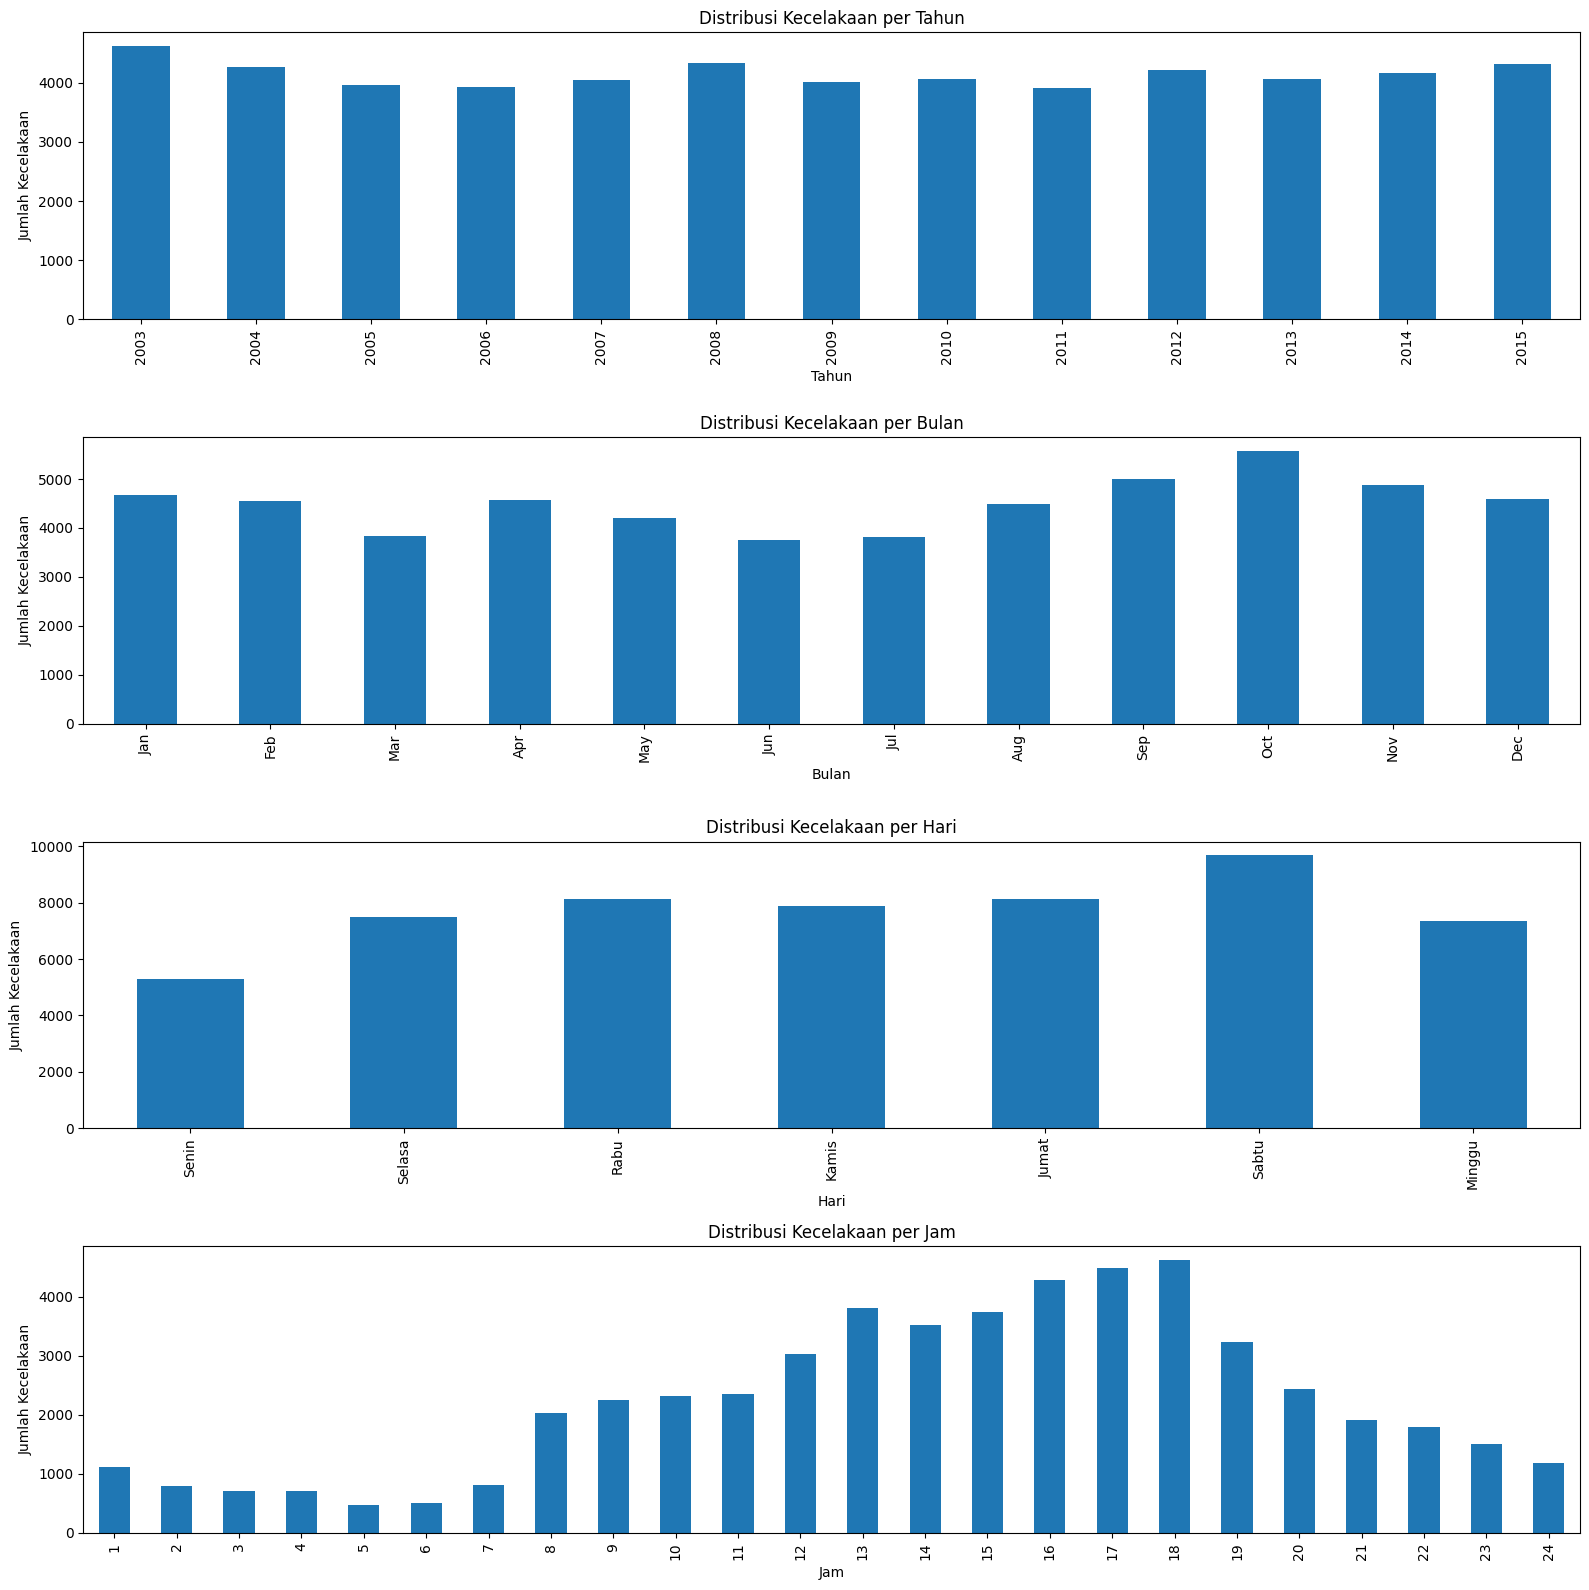

In [20]:
fig, axes = plt.subplots(nrows=4, figsize=(16, 16))

# Distribusi Kecelakaan per Tahun
df['Year'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribusi Kecelakaan per Tahun')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Kecelakaan')

# Distribusi Kecelakaan per Bulan
months = df['Month'].value_counts().sort_index().index
df['Month'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribusi Kecelakaan per Bulan')
axes[1].set_xlabel('Bulan')
axes[1].set_ylabel('Jumlah Kecelakaan')
axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Distribusi Kecelakaan per Hari
bahasa = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
days = df['Day'].value_counts().sort_index().index
df['Day'].value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Distribusi Kecelakaan per Hari')
axes[2].set_xlabel('Hari')
axes[2].set_ylabel('Jumlah Kecelakaan')
axes[2].set_xticks(range(0, 7))
axes[2].set_xticklabels(bahasa)

# Distribusi Kecelakaan per Jam
hours = df['Hour'].value_counts().sort_index().index
df['Hour'].value_counts().sort_index().plot(kind='bar', ax=axes[3])
axes[3].set_title('Distribusi Kecelakaan per Jam')
axes[3].set_xlabel('Jam')
axes[3].set_ylabel('Jumlah Kecelakaan')
axes[3].set_xticks(range(24))
axes[3].set_xticklabels([str(i) for i in range(1, 25)])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

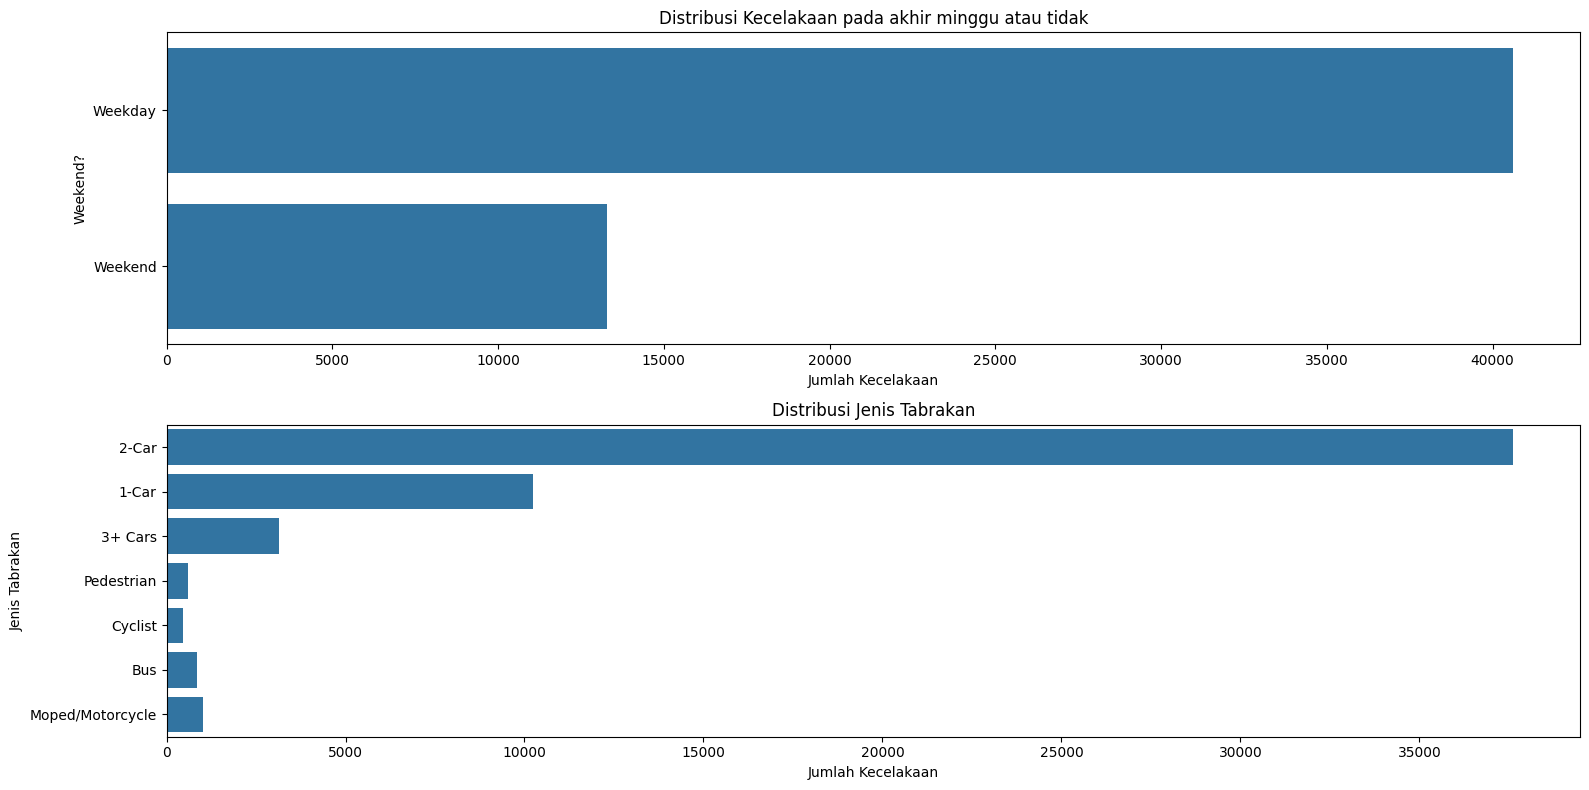

In [21]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))

# Distribusi Kecelakaan pada akhir minggu atau tidak
sns.countplot(df['Weekend?'], ax=axes[0])
axes[0].set_title('Distribusi Kecelakaan pada akhir minggu atau tidak')
axes[0].set_xlabel('Jumlah Kecelakaan')
axes[0].set_ylabel('Weekend?')

# Distribusi Jenis Tabrakan
sns.countplot(df['Collision Type'], ax=axes[1])
axes[1].set_title('Distribusi Jenis Tabrakan')
axes[1].set_xlabel('Jumlah Kecelakaan')
axes[1].set_ylabel('Jenis Tabrakan')

# Adjust layout
plt.tight_layout()

Text(0, 0.5, '')

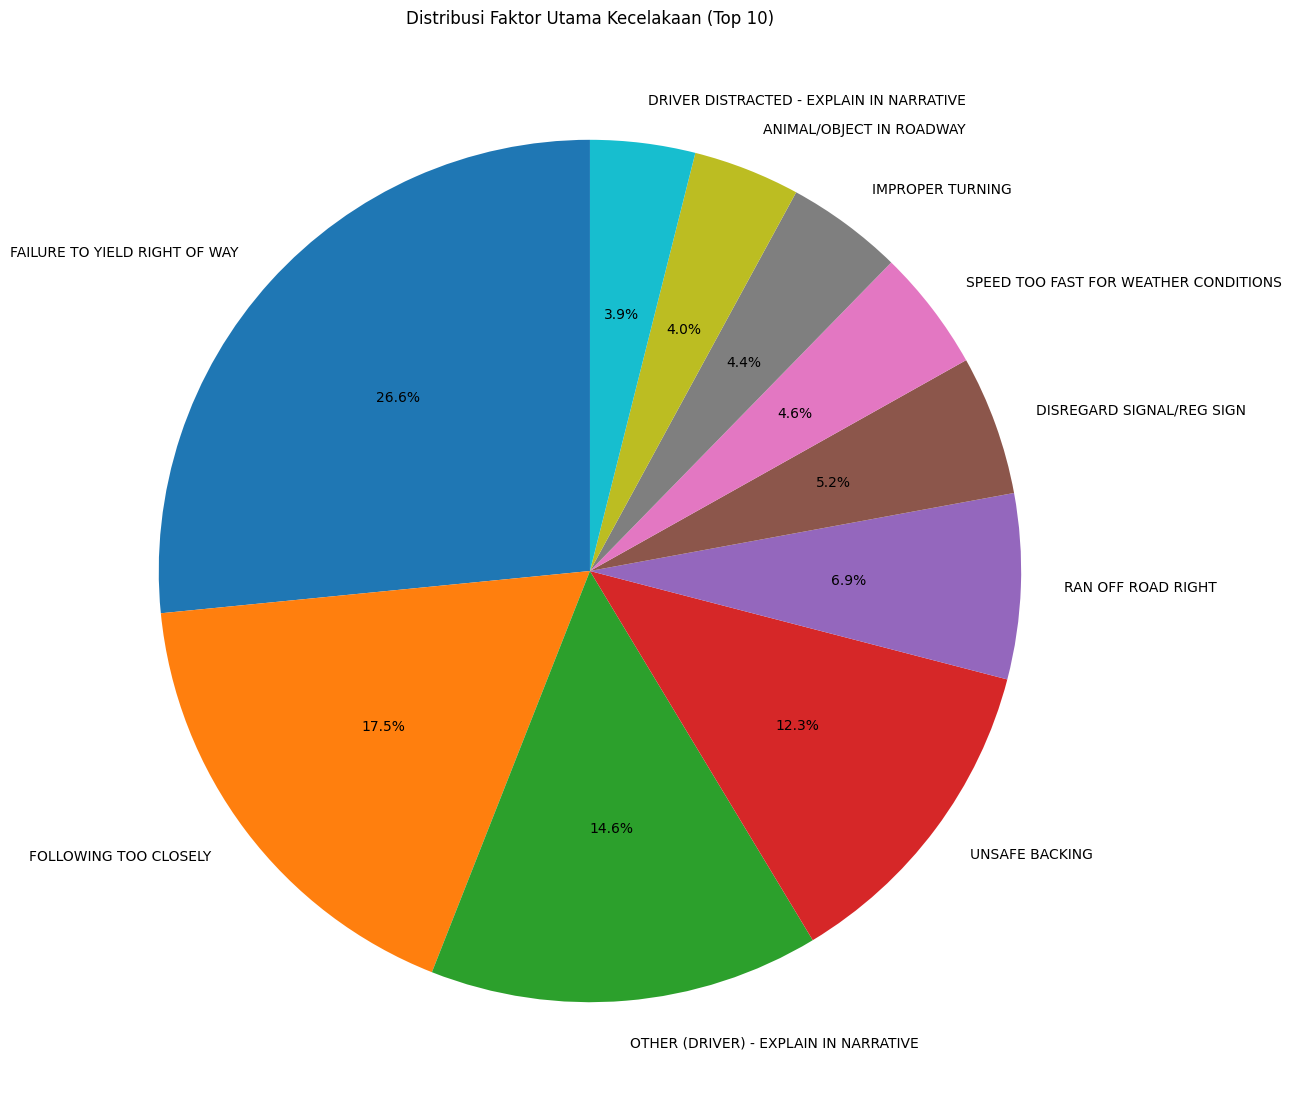

In [22]:
plt.figure(figsize=(14, 14))

value_counts = df['Primary Factor'].value_counts().head(10)
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribusi Faktor Utama Kecelakaan (Top 10)')
plt.ylabel('')

Text(0, 0.5, '')

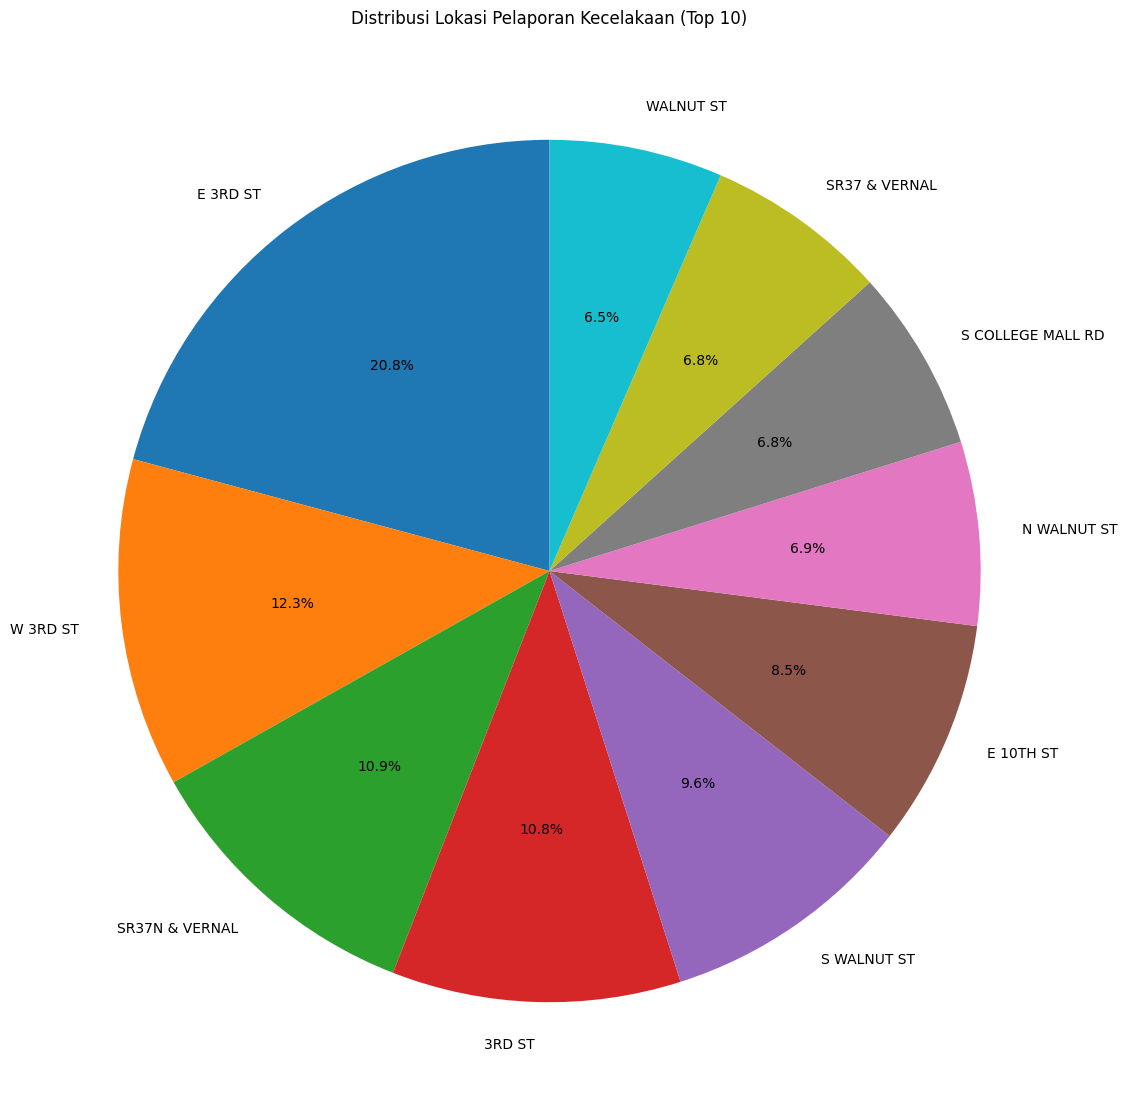

In [23]:
plt.figure(figsize=(14, 14))

value_counts = df['Reported_Location'].value_counts().head(10)
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribusi Lokasi Pelaporan Kecelakaan (Top 10)')
plt.ylabel('')

### **5. Data Preparation**
#### **5.1 Menghapus duplikasi**

In [24]:
df.drop_duplicates(inplace=True)

#### **5.2 Mengisi nilai missing value**

In [25]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [26]:
column = ['Weekend?', 'Hour', 'Collision Type', 'Primary Factor', 'Reported_Location', 'Latitude', 'Longitude']

for nan in column:
    median = df[nan].mode()[0]
    df[nan].fillna(median, inplace=True)

df.isnull().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

#### **5.3 Melakukan Subset Data, Encoding dan Scaling**

In [27]:
data_subset = df[['Hour', 'Collision Type', 'Injury Type', 'Primary Factor']]
data_subset = data_subset.sample(frac=0.6, random_state=42)

label_encoder = LabelEncoder()
data_encoded = data_subset.apply(label_encoder.fit_transform)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

### **6. Modeling**
#### **6.1 Algoritma yang digunakan**

In [28]:
# Partitioning_Cluster (KMEANS Clustering)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
data_subset['Partitioning_Cluster'] = kmeans.fit_predict(data_scaled)

# Hierarchical Clustering (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=3)
data_subset['Hierarchical_Cluster'] = agg_cluster.fit_predict(data_scaled)

# Density-based Clustering (DBSCAN)
dbscan = DBSCAN(eps=0.5, min_samples=20)
data_subset['Density_Cluster'] = dbscan.fit_predict(data_scaled)

# Model-based Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
data_subset['Model_Based_Cluster'] = gmm.fit_predict(data_scaled)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [29]:
print(f"{data_subset['Partitioning_Cluster'].value_counts()}\n")
print(f"{data_subset['Hierarchical_Cluster'].value_counts()}\n")
print(f"{data_subset['Model_Based_Cluster'].value_counts()}")

Partitioning_Cluster
0    15831
2     9860
1     6636
Name: count, dtype: int64

Hierarchical_Cluster
0    18802
2     7708
1     5817
Name: count, dtype: int64

Model_Based_Cluster
0    24669
1     6723
2      935
Name: count, dtype: int64


In [30]:
data_subset['Density_Cluster'].value_counts()

Density_Cluster
 2     18386
 0      4678
 1      3793
 3      1284
 4      1085
-1       822
 5       654
 7       361
 6       348
 12      217
 9       153
 10      106
 13       97
 8        89
 11       56
 14       54
 16       45
 18       26
 17       21
 15       21
 20       17
 19       14
Name: count, dtype: int64

#### **6.2 Visualisasi hasil modeling**

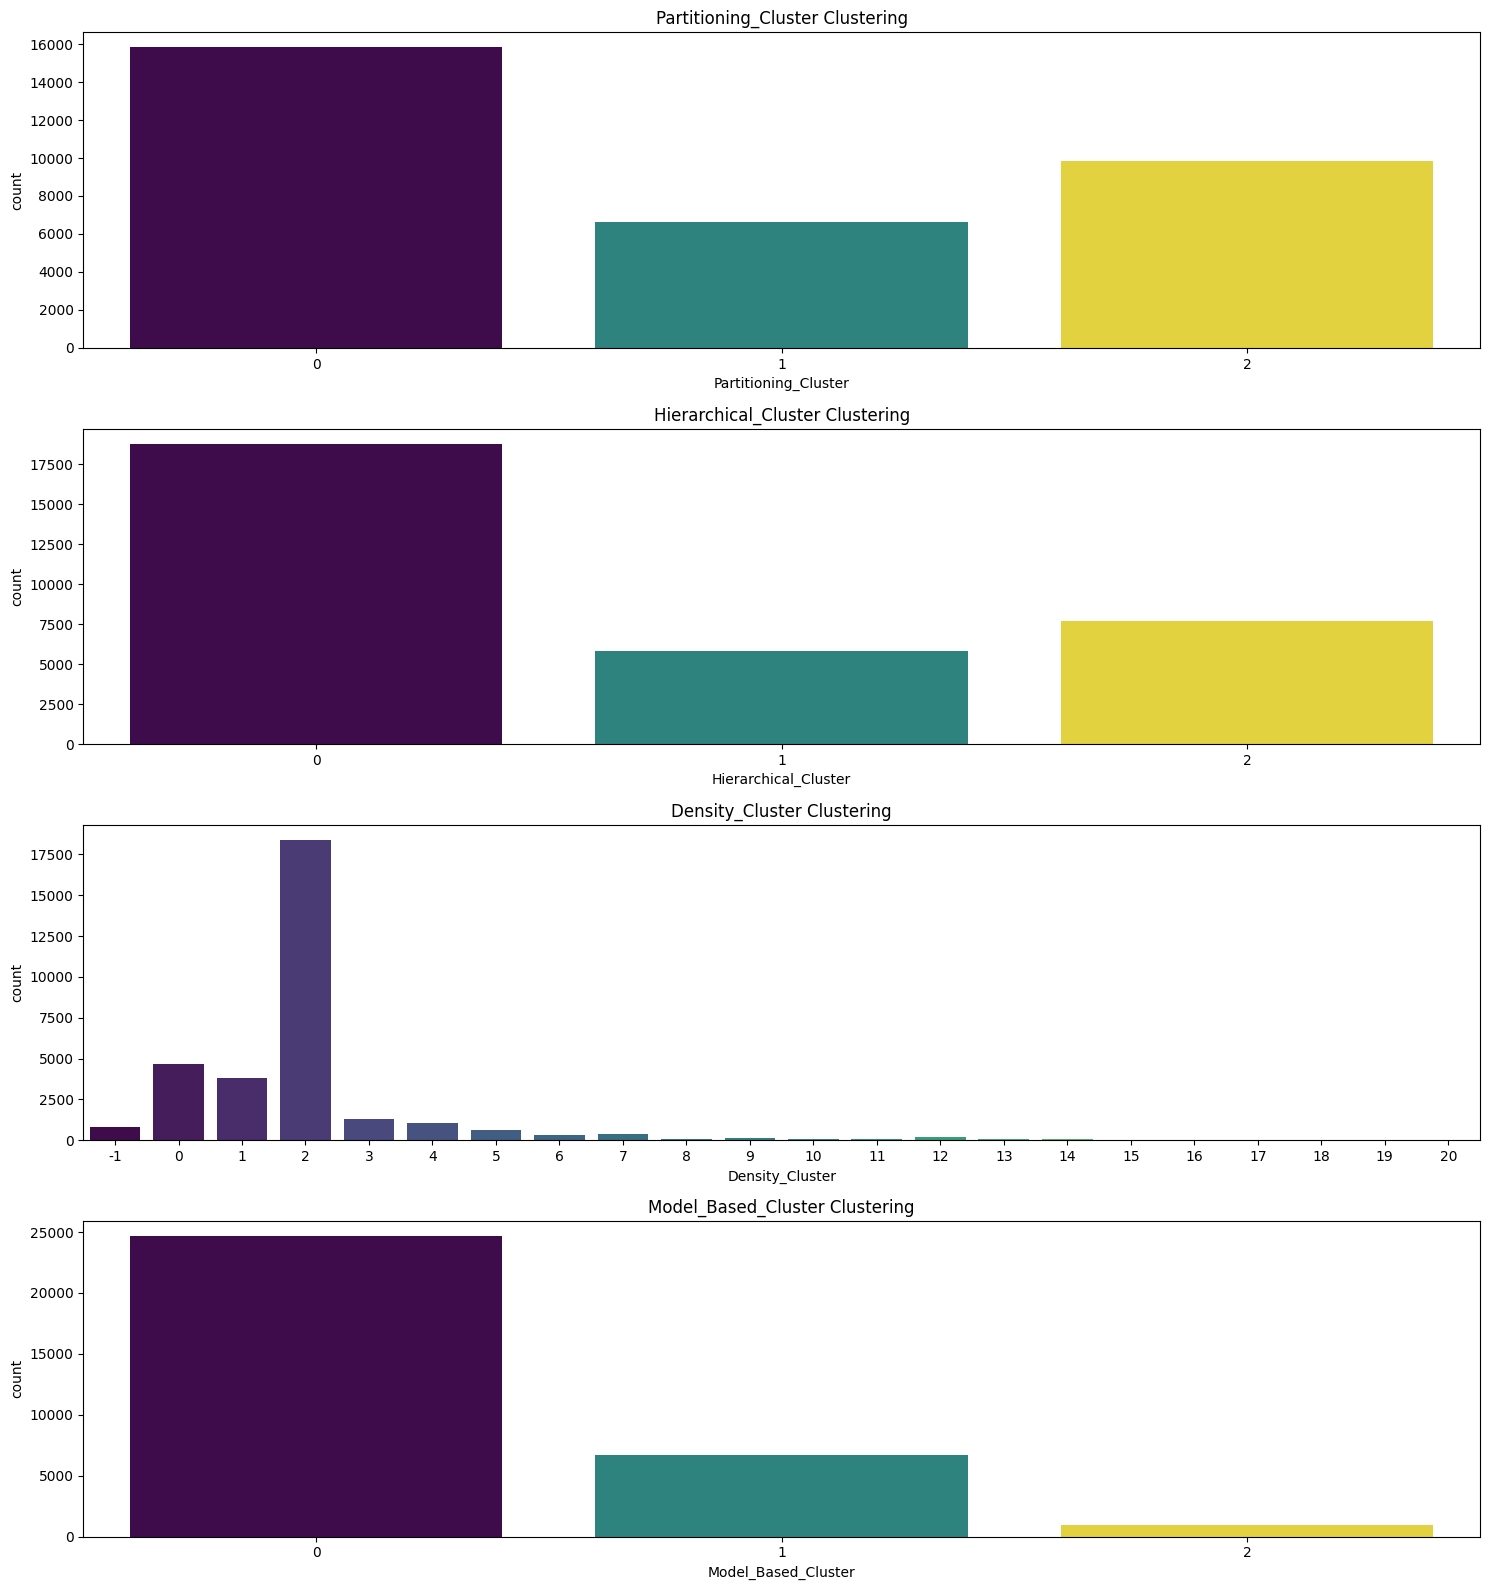

In [31]:
cluster_columns = ['Partitioning_Cluster', 'Hierarchical_Cluster', 'Density_Cluster', 'Model_Based_Cluster']

plt.figure(figsize=(15, 16))
for i, column in enumerate(cluster_columns, 1):
    plt.subplot(4, 1, i)
    sns.countplot(data=data_subset, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'{column} Clustering')

plt.tight_layout()
plt.show()

#### **6.3 Metrik Evaluasi**

In [32]:
# Fit and predict clusters
data_subset['Partitioning_Cluster'] = kmeans.fit_predict(data_scaled)
data_subset['Hierarchical_Cluster'] = agg_cluster.fit_predict(data_scaled)
data_subset['Density_Cluster'] = dbscan.fit_predict(data_scaled)
data_subset['Model_Based_Cluster'] = gmm.fit_predict(data_scaled)

# Calculate Silhouette Score
silhouette_scores = {
    'KMeans': silhouette_score(data_scaled, data_subset['Partitioning_Cluster']),
    'Agg_Cluster': silhouette_score(data_scaled, data_subset['Hierarchical_Cluster']),
    'DBSCAN': silhouette_score(data_scaled, data_subset['Density_Cluster']),
    'GMM': silhouette_score(data_scaled, data_subset['Model_Based_Cluster'])
}

# Calculate Calinski-Harabasz Index
calinski_harabasz_scores = {
    'KMeans': calinski_harabasz_score(data_scaled, data_subset['Partitioning_Cluster']),
    'Agg_Cluster': calinski_harabasz_score(data_scaled, data_subset['Hierarchical_Cluster']),
    'DBSCAN': calinski_harabasz_score(data_scaled, data_subset['Density_Cluster']),
    'GMM': calinski_harabasz_score(data_scaled, data_subset['Model_Based_Cluster'])
}

# Display the results
print("Silhouette Scores:")
for algorithm, score in silhouette_scores.items():
    print(f"{algorithm}: {score:.4f}")

print("\nCalinski-Harabasz Scores:")
for algorithm, score in calinski_harabasz_scores.items():
    print(f"{algorithm}: {score:.4f}")

Silhouette Scores:
KMeans: 0.3300
Agg_Cluster: 0.3138
DBSCAN: 0.0982
GMM: 0.3733

Calinski-Harabasz Scores:
KMeans: 10734.5449
Agg_Cluster: 8588.1148
DBSCAN: 1358.9695
GMM: 6163.6951


### **7. Tunning Model**

Text(0, 0.5, 'Inertia')

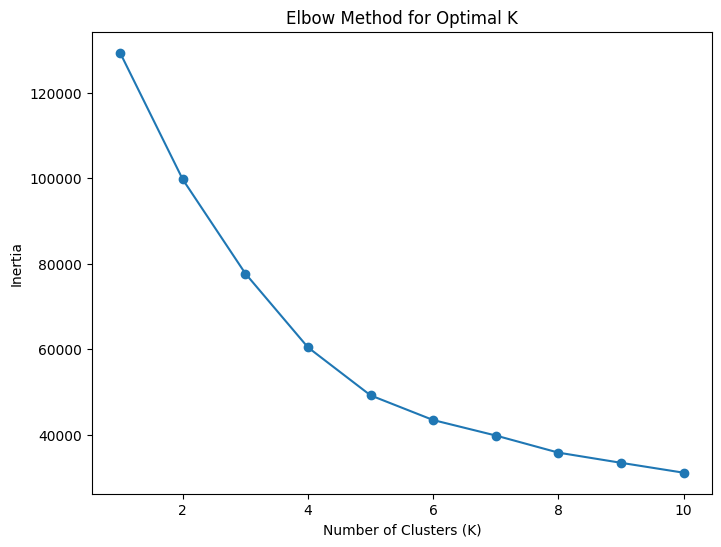

In [33]:
inertia_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')